### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
import joblib

### Loading the dataset after performing PCA 

In [2]:
try:
    df = pd.read_csv('pca_transformed_dataset.csv')
    print("PCA dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'pca_transformed_dataset.csv' not found.")
    exit()

X = df.drop('target', axis=1)
y = df['target']

PCA dataset loaded successfully.


### Feature importance analysis with Random Forest


Step 1: Calculating Feature Importance using Random Forest...


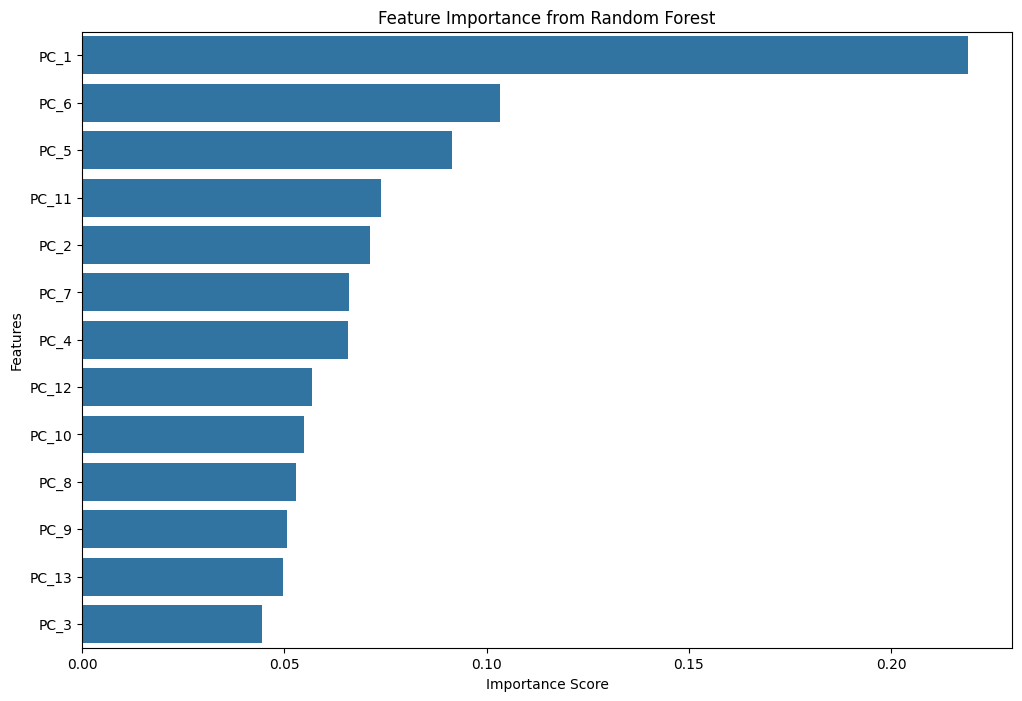

In [3]:
print("\nStep 1: Calculating Feature Importance using Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### Recursive Feature Elimination (RFE)

In [4]:
print("\nStep 2: Applying Recursive Feature Elimination (RFE)...")
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]
print("Selected features via RFE:", list(rfe_features))



Step 2: Applying Recursive Feature Elimination (RFE)...
Selected features via RFE: ['PC_1', 'PC_2', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_10', 'PC_11', 'PC_12']


### Chi-Square Test

In [5]:
print("\nStep 3: Applying Chi-Square Test...")

from sklearn.preprocessing import MinMaxScaler
X_chi = df.drop('target', axis=1)
X_chi = MinMaxScaler().fit_transform(X_chi)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_chi, y)

chi2_scores = pd.DataFrame({'Feature': X.columns, 'Chi2_Score': chi2_selector.scores_})
print("\nChi-Square Scores for Features:")
print(chi2_scores.sort_values(by='Chi2_Score', ascending=False))

joblib.dump(chi2_selector, 'E:/VS Code Projects/Heart-Disease-Project/model/chi2_selector.pkl')



Step 3: Applying Chi-Square Test...

Chi-Square Scores for Features:
   Feature  Chi2_Score
0     PC_1    7.260847
5     PC_6    2.536844
1     PC_2    0.684040
3     PC_4    0.598552
6     PC_7    0.536539
4     PC_5    0.536499
8     PC_9    0.063866
7     PC_8    0.024859
9    PC_10    0.015528
10   PC_11    0.012046
12   PC_13    0.011730
11   PC_12    0.000247
2     PC_3    0.000065


['E:/VS Code Projects/Heart-Disease-Project/model/chi2_selector.pkl']

### Selecting the final features 

In [6]:
print("\nSelecting final features based on Random Forest importance...")
final_features = importances.index[:12].tolist()
print("Final selected features:", final_features)

df_reduced = df[final_features + ['target']]
df_reduced.to_csv('feature_selected_dataset.csv', index=False)
print("\nReduced dataset saved to 'feature_selected_dataset.csv'.")
print("Shape of reduced dataset:", df_reduced.shape)


Selecting final features based on Random Forest importance...
Final selected features: ['PC_1', 'PC_6', 'PC_5', 'PC_11', 'PC_2', 'PC_7', 'PC_4', 'PC_12', 'PC_10', 'PC_8', 'PC_9', 'PC_13']

Reduced dataset saved to 'feature_selected_dataset.csv'.
Shape of reduced dataset: (303, 13)
